4
[[16  0]
 [ 9  0]
 [ 0  4]
 [ 1  1]]
[16  9  4  2]
[4.         3.         2.         1.41421356]
[3 2 1 0]
{'B': 2, 'A': 1}
('B', 2)


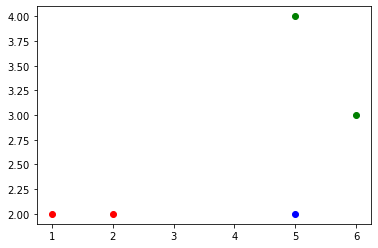

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import font_manager
def createDataSet():
    group = np.array([[1, 2], [2, 2], [5, 4], [6, 3]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

def classify_knn(in_point, dataset, labels, k):
    #1、compute the distance
    irow = dataset.shape[0]
    print(irow)

    #change the input data
    in_mat = np.tile(in_point, (irow, 1))

    diff_mat = in_mat - dataset
    sq_diff_mat = diff_mat**2
    print(sq_diff_mat)
    sq_distance = sq_diff_mat.sum(axis=1)
    print(sq_distance)
    distance = sq_distance**0.5
    print(distance)
#2、sort the data
    sort_dis_index = distance.argsort()
    print(sort_dis_index)
#3、select k nearest points and statistic 
    labels_count = {}
    for i in range(k):
        vote_label = labels[sort_dis_index[i]]
        labels_count[vote_label] = labels_count.get(vote_label, 0) + 1
#4determin the category of the k nearest points and sort them
    print(labels_count)
    sort_labels_count = sorted(labels_count.items(), key= lambda x:x[1], reverse=True)
#5. use the majority classification rule。
    return sort_labels_count[0]

def draw(in_point, dataset, labels):
    for i in range(len(labels)):
        if labels[i] == 'A':
            plt.scatter(dataset[i, 0], dataset[i, 1], c = 'r')
        if labels[i] == 'B':
            plt.scatter(dataset[i, 0], dataset[i, 1], c = 'g')
    plt.scatter(in_point[0], in_point[1], c = 'b')
    plt.show()


if __name__ == '__main__':
    dataset, labels = createDataSet()
    result = classify_knn([5, 2], dataset, labels, 3)
    print(result)
    draw([5, 2], dataset, labels)
